In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from CoolProp import AbstractState
from CoolProp.CoolProp import PhaseSI, PropsSI, get_global_param_string
import scipy.constants as const
import sympy as sp
from scipy.optimize import curve_fit
import math

In [109]:
def load_data(file,h=0,k=1):
    df = pd.read_csv(file)
    pressure = df.iloc[:, h].to_numpy()
    volume = df.iloc[:, k].to_numpy()
    return volume,pressure

/var/folders/xm/qnmpmpfn4k9gsr6mycrzv8_40000gn/T/ipykernel_8646/3896779368.py:14: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(Langmuir_208C[1],Langmuir_208C[0], label="208C",marker='x', s=15, edgecolor='black', linewidth=0.75)
/var/folders/xm/qnmpmpfn4k9gsr6mycrzv8_40000gn/T/ipykernel_8646/3896779368.py:18: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(Langmuir_SC2[1],Langmuir_SC2[0], label="SC2",marker='x', s=15, edgecolor='black', linewidth=0.75)


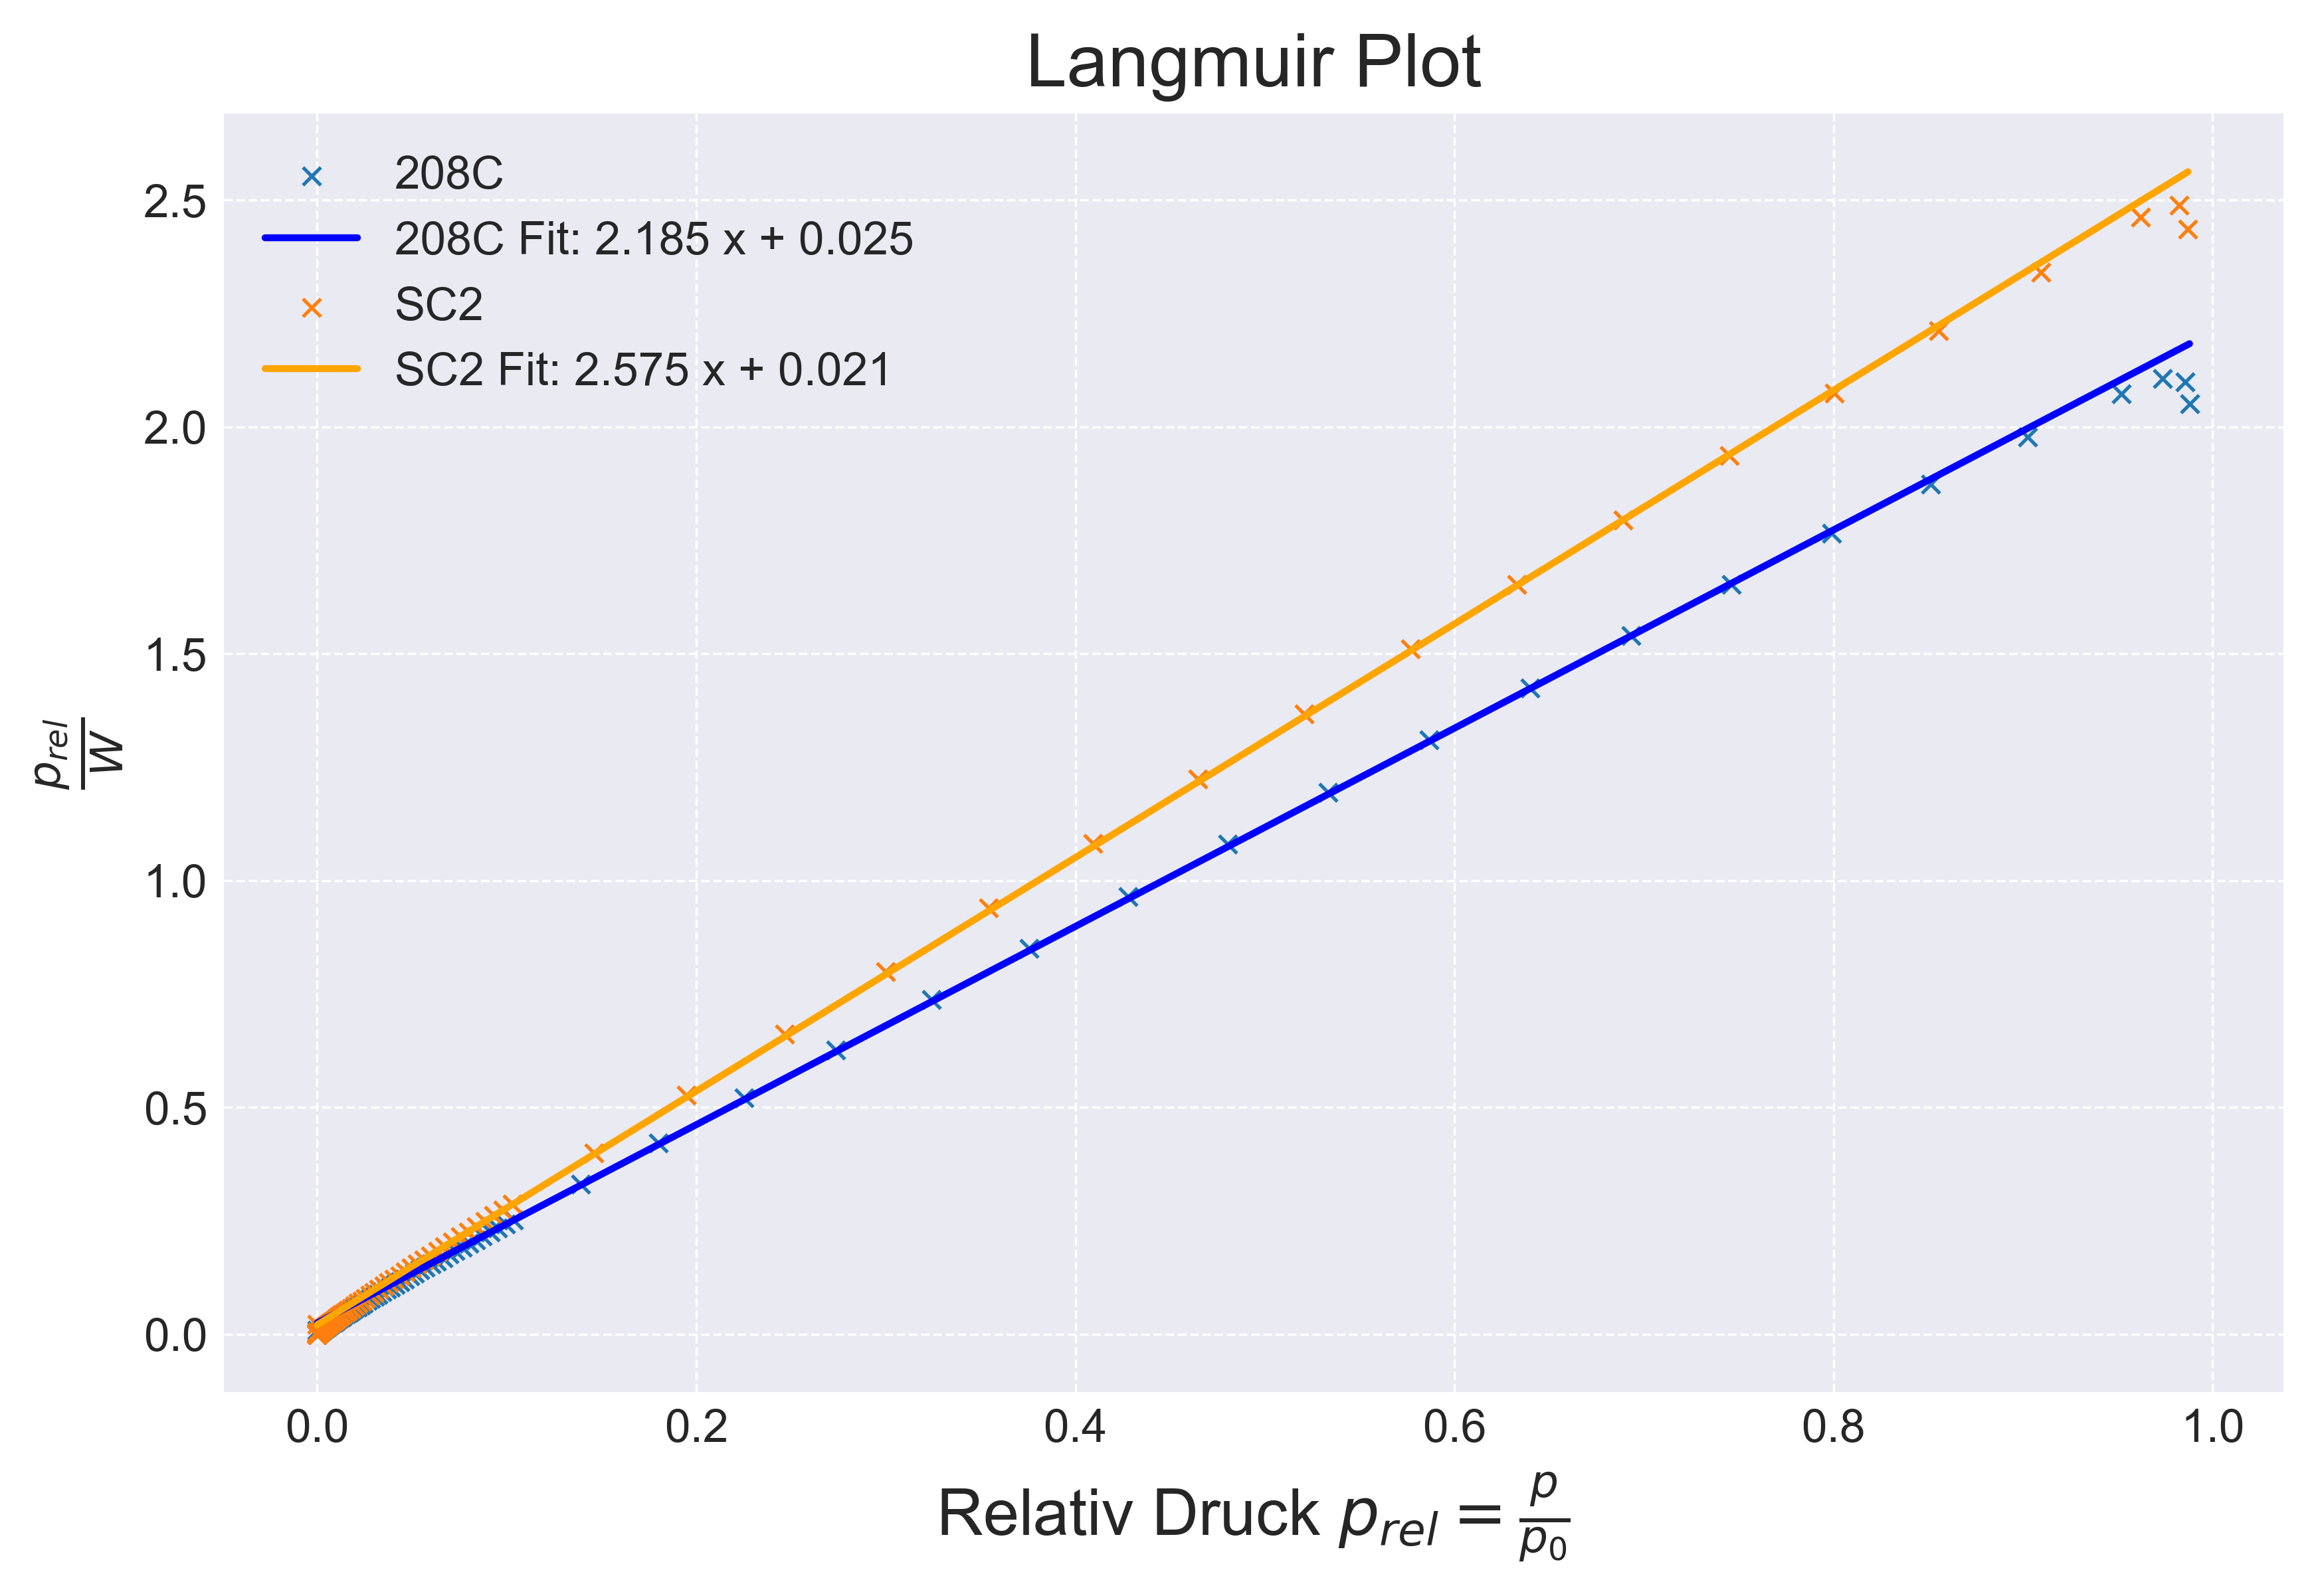

In [236]:
plt.figure(figsize=(8, 5), dpi=500)
Langmuir_SC2=load_data('/Users/nick/Documents/Messdaten BA/Nick_Zobel/all_data_BAM_P109_N2_77K_VectorDose__iq_phisy_st1_2024_05_17_13_45_39 (Langmuir).csv')

Langmuir_208C=load_data('/Users/nick/Documents/Messdaten BA/Nick_Zobel/all_data_ERM_FD107_N2_77K_VectorDose__iq_phisy_st2_2024_05_17_13_45_39 (Langmuir).csv')

# Stil einstellen
plt.style.use('seaborn-darkgrid')  # Beispiel: 'seaborn-darkgrid' Stil

# Achsenbeschriftungen
plt.xlabel(r"Relativ Druck $p_{rel}=\frac{p}{p_0}$", fontsize=14)
plt.ylabel(r"$\frac{p_{rel}}{W}$", fontsize=14)

# Daten plotten
plt.scatter(Langmuir_208C[1],Langmuir_208C[0], label="208C",marker='x', s=15, edgecolor='black', linewidth=0.75)
x=np.linspace(np.min(Langmuir_208C[1]),np.max(Langmuir_208C[1]),100)
plt.plot(x,x*2.18518+0.02454,c="blue",label="208C Fit: 2.185 x + 0.025")

plt.scatter(Langmuir_SC2[1],Langmuir_SC2[0], label="SC2",marker='x', s=15, edgecolor='black', linewidth=0.75)
x=np.linspace(np.min(Langmuir_SC2[1]),np.max(Langmuir_SC2[1]),100)
plt.plot(x,x*2.57492+0.02058 ,c="orange",label="SC2 Fit: 2.575 x + 0.021")
# Skalierung der Achsen



# Titel setzen
plt.title("Langmuir Plot", fontsize=16)

# Legende hinzufügen

plt.legend()

# Raster hinzufügen
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

In [229]:
print(1/2.18518 )
#print(PropsSI("D", "P", 101325, "T", 273.15, "Nitrogen")*0.001)
print(28.013 /(22.4*1000))
print(0.4576282045415023/0.0012505803571428572)
print((0.38836158016559735*0.162e-18*6.02214076e23/(28.013 )))
print(1418/(407*6.02214076e23/(22.4*1000)))
print()

0.4576282045415023
0.0012505803571428572
365.9326663238372
1352.5164475364536
1.2959222235492954e-19



p_rel/W=1/(k*W_mono)+p_rel/(W_mono)
fit: p_rel/W [g/g] = p_rel*a+b

a=1/W_mono 
b=1/(k*W_mono)
W_mono=0.4576282045415023[g/g]
V_mono[cc/g]=W_mono[g/g]/M_mol[g/mol]*V_mol[cc/mol]=402.07556075550525 [cc/g]

cc in mol in g

Sm=V_mono*A_m*N_A/V_mol=W/M_mol*A_m*N_A
[m^2/g]=[cc/g]*[mol/cc][m^2/mol]=[g/g]*[mol/g][m^2/mol]

/var/folders/xm/qnmpmpfn4k9gsr6mycrzv8_40000gn/T/ipykernel_8646/1095159161.py:14: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(Langmuir_208C[1],Langmuir_208C[0], label="208C",marker='x', s=15, edgecolor='black', linewidth=0.75)
/var/folders/xm/qnmpmpfn4k9gsr6mycrzv8_40000gn/T/ipykernel_8646/1095159161.py:18: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(Langmuir_SC2[1],Langmuir_SC2[0], label="SC2",marker='x', s=15, edgecolor='black', linewidth=0.75)


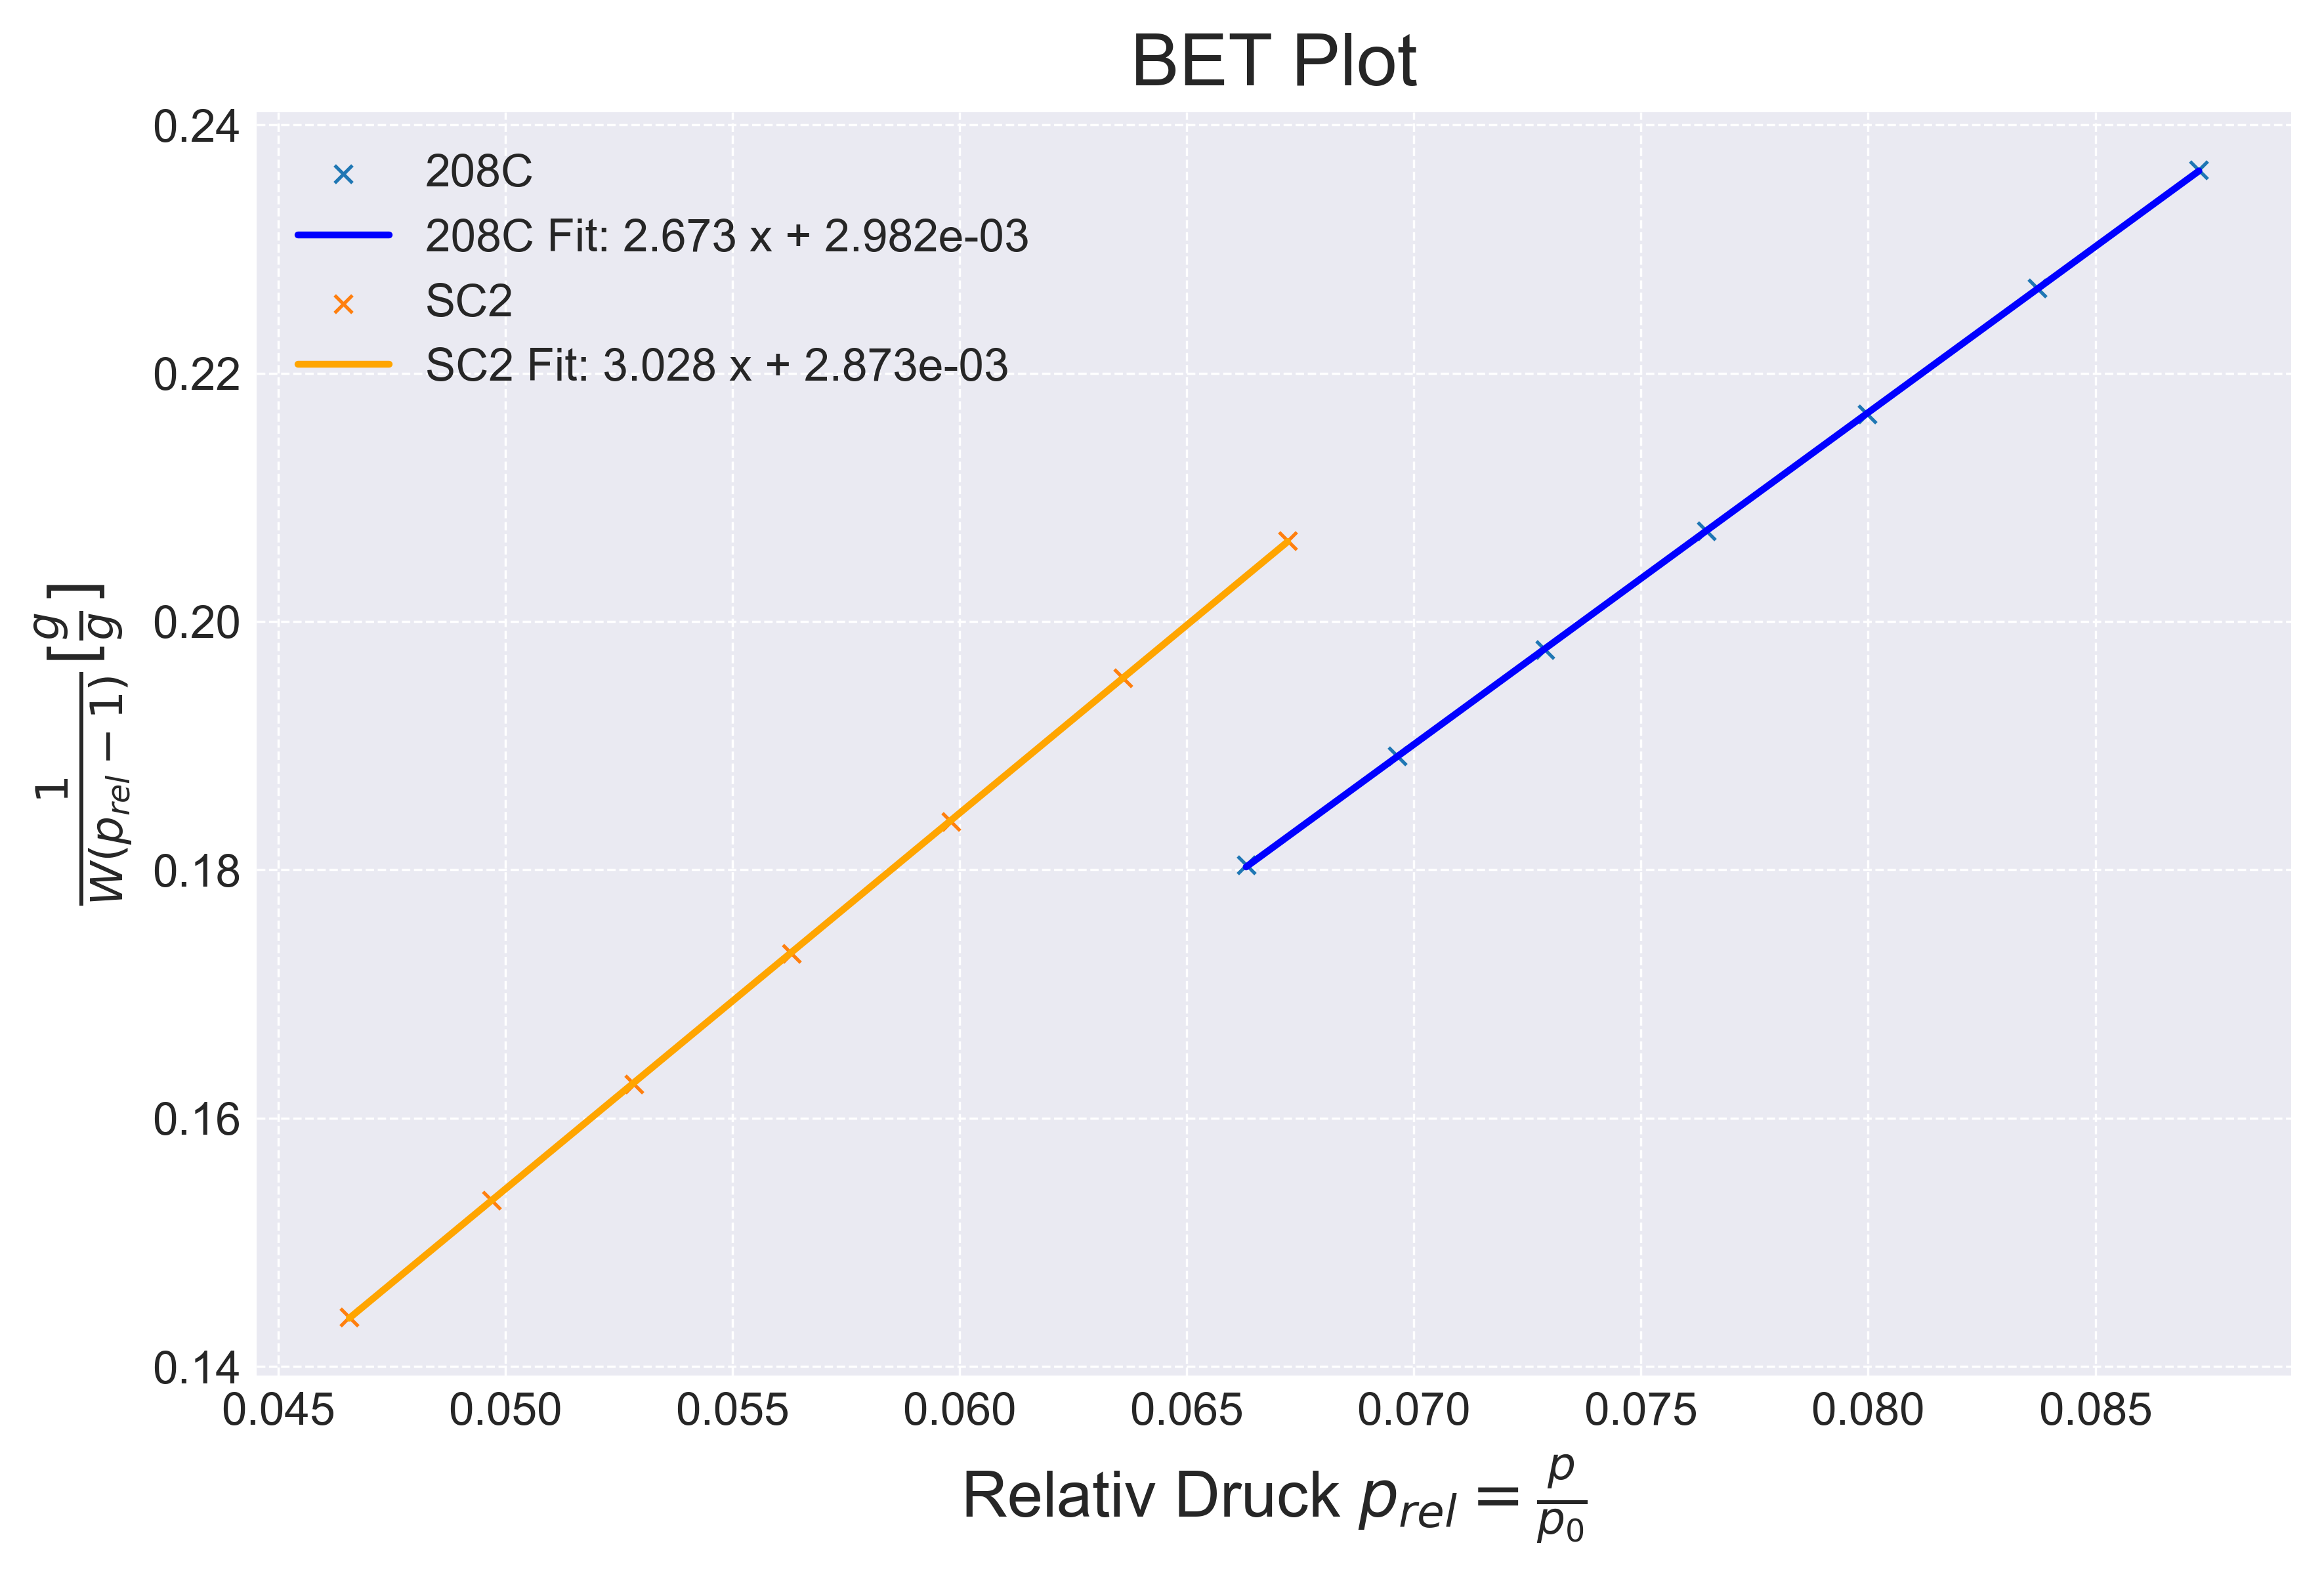

In [235]:
plt.figure(figsize=(8, 5), dpi=500)
Langmuir_SC2=load_data('/Users/nick/Documents/Messdaten BA/Nick_Zobel/BAM_P109_N2_77K_VectorDose__iq_phisy_st1_2024_05_17_13_45_39 (Multi-Point BET).csv',0,2)

Langmuir_208C=load_data('/Users/nick/Documents/Messdaten BA/Nick_Zobel/ERM_FD107_N2_77K_VectorDose__iq_phisy_st2_2024_05_17_13_45_39 (Multi-Point BET).csv',0,2)

# Stil einstellen
plt.style.use('seaborn-darkgrid')  # Beispiel: 'seaborn-darkgrid' Stil

# Achsenbeschriftungen
plt.xlabel(r"Relativ Druck $p_{rel}=\frac{p}{p_0}$", fontsize=14)
plt.ylabel(r"$\frac{1}{W(p_{rel}- 1)} [\frac{g}{g}]$", fontsize=14)

# Daten plotten
plt.scatter(Langmuir_208C[1],Langmuir_208C[0], label="208C",marker='x', s=15, edgecolor='black', linewidth=0.75)
x=np.linspace(np.min(Langmuir_208C[1]),np.max(Langmuir_208C[1]),100)
plt.plot(x,x*2.673+ 2.982e-03,c="blue",label="208C Fit: 2.673 x + 2.982e-03")

plt.scatter(Langmuir_SC2[1],Langmuir_SC2[0], label="SC2",marker='x', s=15, edgecolor='black', linewidth=0.75)
x=np.linspace(np.min(Langmuir_SC2[1]),np.max(Langmuir_SC2[1]),100)
plt.plot(x, x*3.028 + 2.873e-03 ,c="orange",label="SC2 Fit: 3.028 x + 2.873e-03")

# Skalierung der Achsen



# Titel setzen
plt.title("BET Plot", fontsize=16)

# Legende hinzufügen

plt.legend()

# Raster hinzufügen
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

/var/folders/xm/qnmpmpfn4k9gsr6mycrzv8_40000gn/T/ipykernel_8646/3231484976.py:14: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(Langmuir_208C[1],np.log10(Langmuir_208C[0]), label="208C",marker='x', s=15, edgecolor='black', linewidth=0.75)
/var/folders/xm/qnmpmpfn4k9gsr6mycrzv8_40000gn/T/ipykernel_8646/3231484976.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(Langmuir_SC2[1],np.log10(Langmuir_SC2[0]), label="SC2",marker='x', s=15, edgecolor='black', linewidth=0.75)


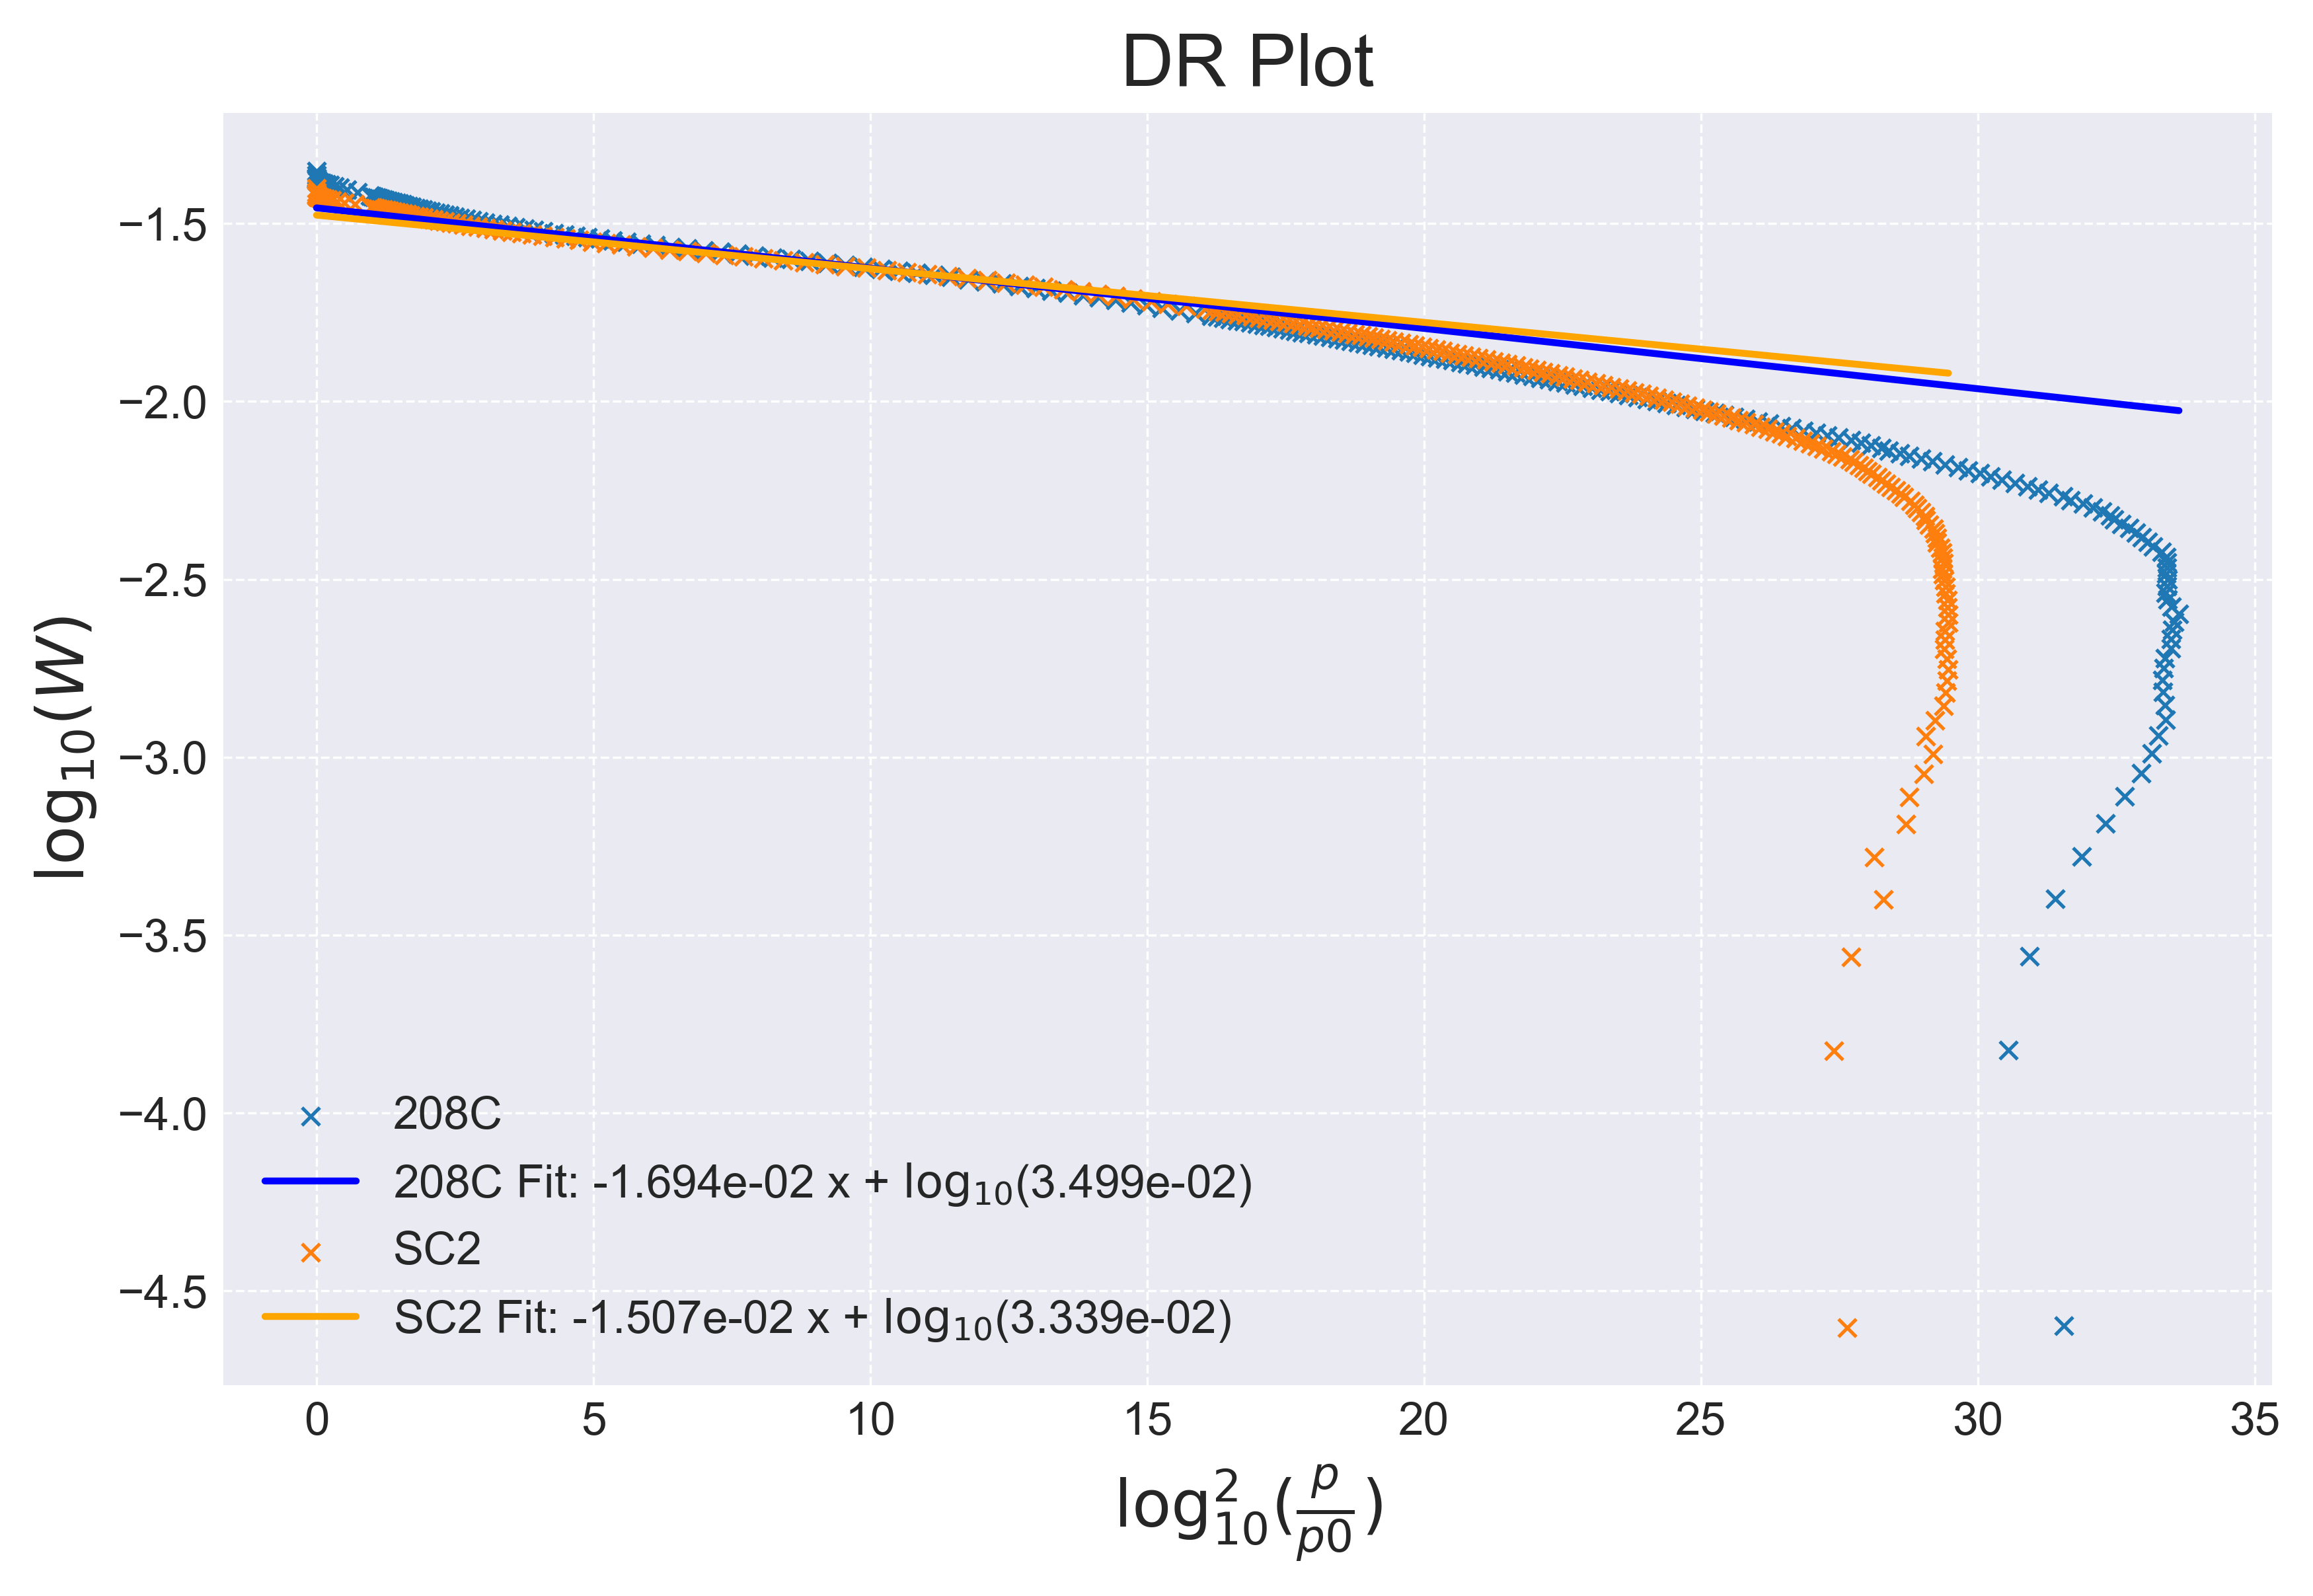

In [239]:
plt.figure(figsize=(8, 5), dpi=500)
Langmuir_SC2=load_data('/Users/nick/Documents/Messdaten BA/Nick_Zobel/all_data_BAM_P109_N2_77K_VectorDose__iq_phisy_st1_2024_05_17_13_45_39 (DR method).csv')

Langmuir_208C=load_data('/Users/nick/Documents/Messdaten BA/Nick_Zobel/all_data_ERM_FD107_N2_77K_VectorDose__iq_phisy_st2_2024_05_17_13_45_39 (DR method).csv')

# Stil einstellen
plt.style.use('seaborn-darkgrid')  # Beispiel: 'seaborn-darkgrid' Stil

# Achsenbeschriftungen
plt.xlabel(r"$\log_{10}^2(\frac{p}{p0})$", fontsize=14)
plt.ylabel(r"$\log_{10}(W)$", fontsize=14)
i=40
# Daten plotten
plt.scatter(Langmuir_208C[1],np.log10(Langmuir_208C[0]), label="208C",marker='x', s=15, edgecolor='black', linewidth=0.75)
x=np.linspace(np.min(Langmuir_208C[1]),np.max(Langmuir_208C[1]),100)
plt.plot(x,x*-1.694e-02+np.log10(3.499e-02),c="blue",label=r"208C Fit: -1.694e-02 x + $\log_{10}$(3.499e-02)")   


plt.scatter(Langmuir_SC2[1],np.log10(Langmuir_SC2[0]), label="SC2",marker='x', s=15, edgecolor='black', linewidth=0.75)
x=np.linspace(np.min(Langmuir_SC2[1]),np.max(Langmuir_SC2[1]),100)
plt.plot(x, x*-1.507e-02+np.log10(3.339e-02),c="orange",label=r"SC2 Fit: -1.507e-02 x + $\log_{10}$(3.339e-02)")

   


# Titel setzen
plt.title("DR Plot", fontsize=16)

# Legende hinzufügen

plt.legend()

# Raster hinzufügen
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

In [204]:
D=1.694e-02
print(D/(0.434*(77)**2))
R=8.314 #J/mol*K
print(np.sqrt(6.583278472679394e-06/2.303)/R)
print(1/0.00020335934009410413)
print(0.5/np.sqrt(5.856552926994006e-06))

w0=3.499e-02 #g/g
v0=w0/(28.013 /(22.4*1000))
print(v0)

6.583278472679394e-06
0.00020335934009410413
4917.403840596906
206.60887269759803
27.979009745475313


Slope =        -1.694e-02
Intercept =         3.499e-02
Correlation Coefficient =         0.9997

Average Half pore width =         5.721≈
Adsorption energy =        22.725 kJ/mol
Micropore volume =         0.470 cc/g
Micropore surface area =      1321.665 m≤/g


Slope=-D
D=0.434B(T/beta)^2
B=2.303(R/E0)^2





/var/folders/xm/qnmpmpfn4k9gsr6mycrzv8_40000gn/T/ipykernel_8646/223146509.py:14: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(Langmuir_208C[1],Langmuir_208C[0], label="208C",marker='x', s=15, edgecolor='black', linewidth=0.75)
/var/folders/xm/qnmpmpfn4k9gsr6mycrzv8_40000gn/T/ipykernel_8646/223146509.py:18: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(Langmuir_SC2[1],Langmuir_SC2[0], label="SC2",marker='x', s=15, edgecolor='black', linewidth=0.75)


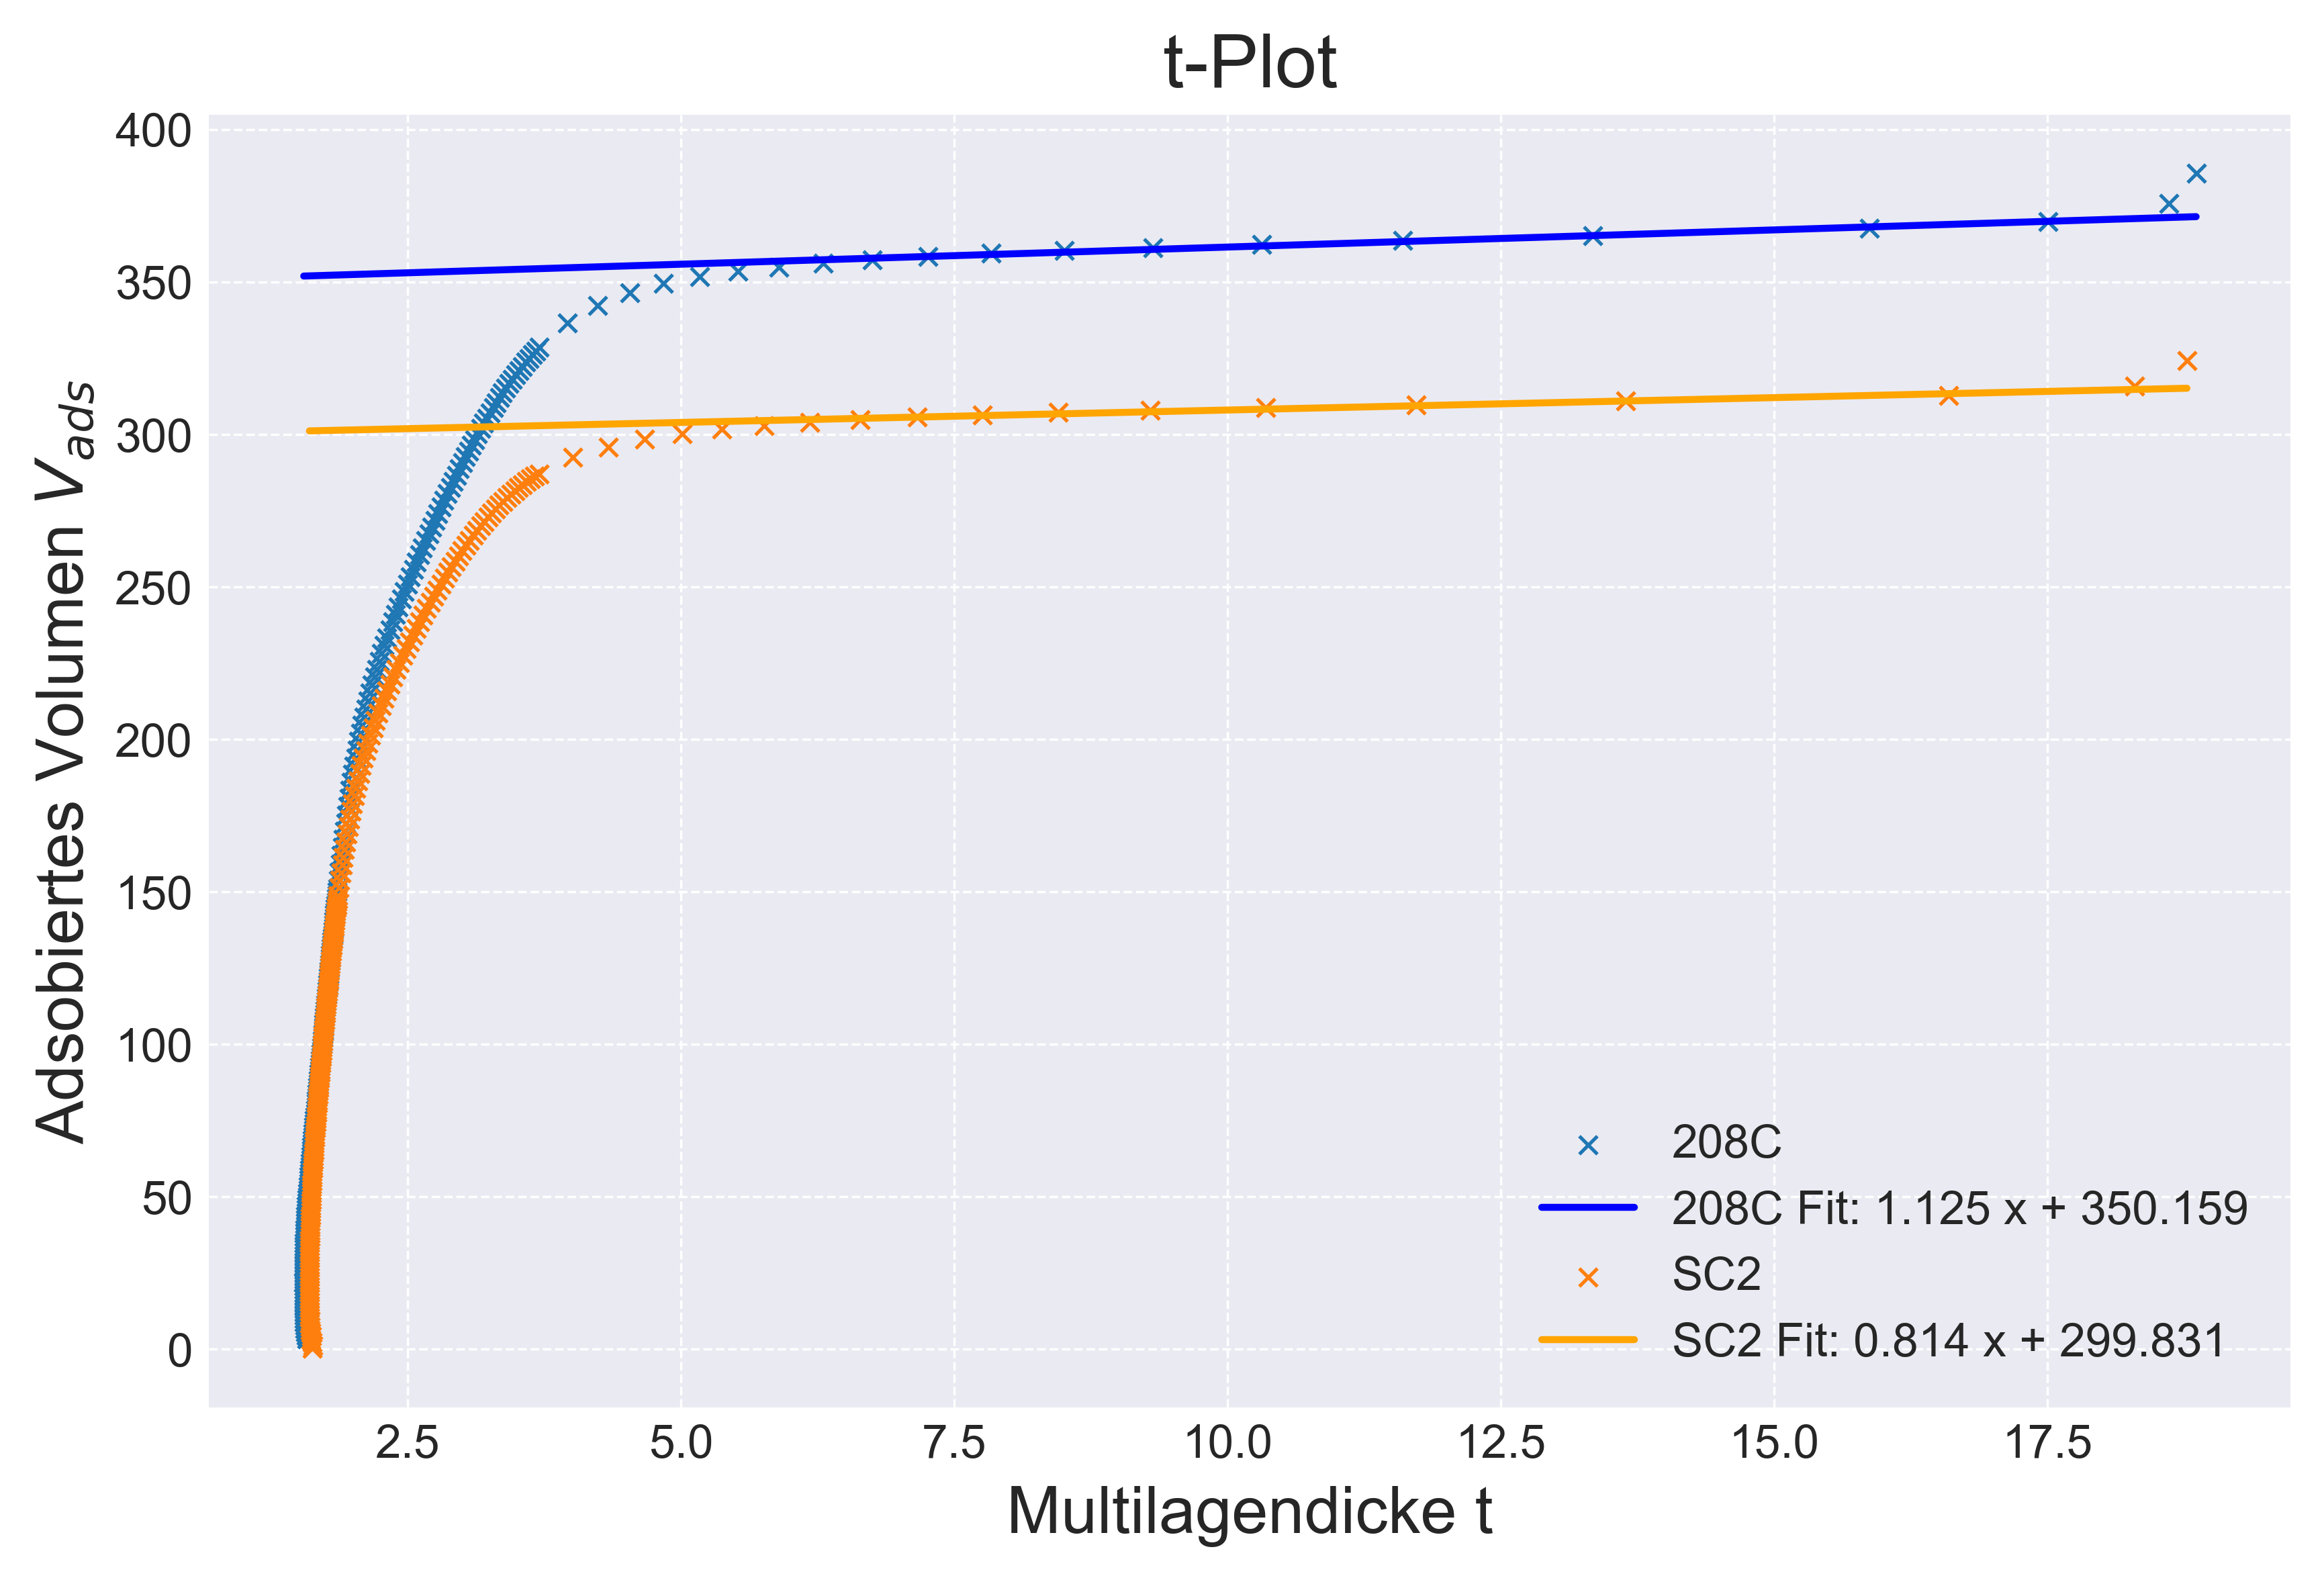

In [241]:
plt.figure(figsize=(8, 5), dpi=500)
Langmuir_SC2=load_data('/Users/nick/Documents/Messdaten BA/Nick_Zobel/all_data_BAM_P109_N2_77K_VectorDose__iq_phisy_st1_2024_05_17_13_45_39 (t-Plot Method Micropore Analysis).csv',1,2)

Langmuir_208C=load_data('/Users/nick/Documents/Messdaten BA/Nick_Zobel/all_points_ERM_FD107_N2_77K_VectorDose__iq_phisy_st2_2024_05_17_13_45_39 (t-Plot Method Micropore Analysis).csv',1,2)

# Stil einstellen
plt.style.use('seaborn-darkgrid')  # Beispiel: 'seaborn-darkgrid' Stil

# Achsenbeschriftungen
plt.xlabel("Multilagendicke t", fontsize=14)
plt.ylabel(r"Adsobiertes Volumen $V_{ads}$", fontsize=14)
i=40
# Daten plotten
plt.scatter(Langmuir_208C[1],Langmuir_208C[0], label="208C",marker='x', s=15, edgecolor='black', linewidth=0.75)
x=np.linspace(np.min(Langmuir_208C[1]),np.max(Langmuir_208C[1]),100)
plt.plot(x,x*1.125+350.159,c="blue",label="208C Fit: 1.125 x + 350.159")   

plt.scatter(Langmuir_SC2[1],Langmuir_SC2[0], label="SC2",marker='x', s=15, edgecolor='black', linewidth=0.75)
x=np.linspace(np.min(Langmuir_SC2[1]),np.max(Langmuir_SC2[1]),100)
plt.plot(x, x*0.814+299.831,c="orange",label="SC2 Fit: 0.814 x + 299.831")



# Titel setzen
plt.title("t-Plot", fontsize=16)

# Legende hinzufügen

plt.legend()

# Raster hinzufügen
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

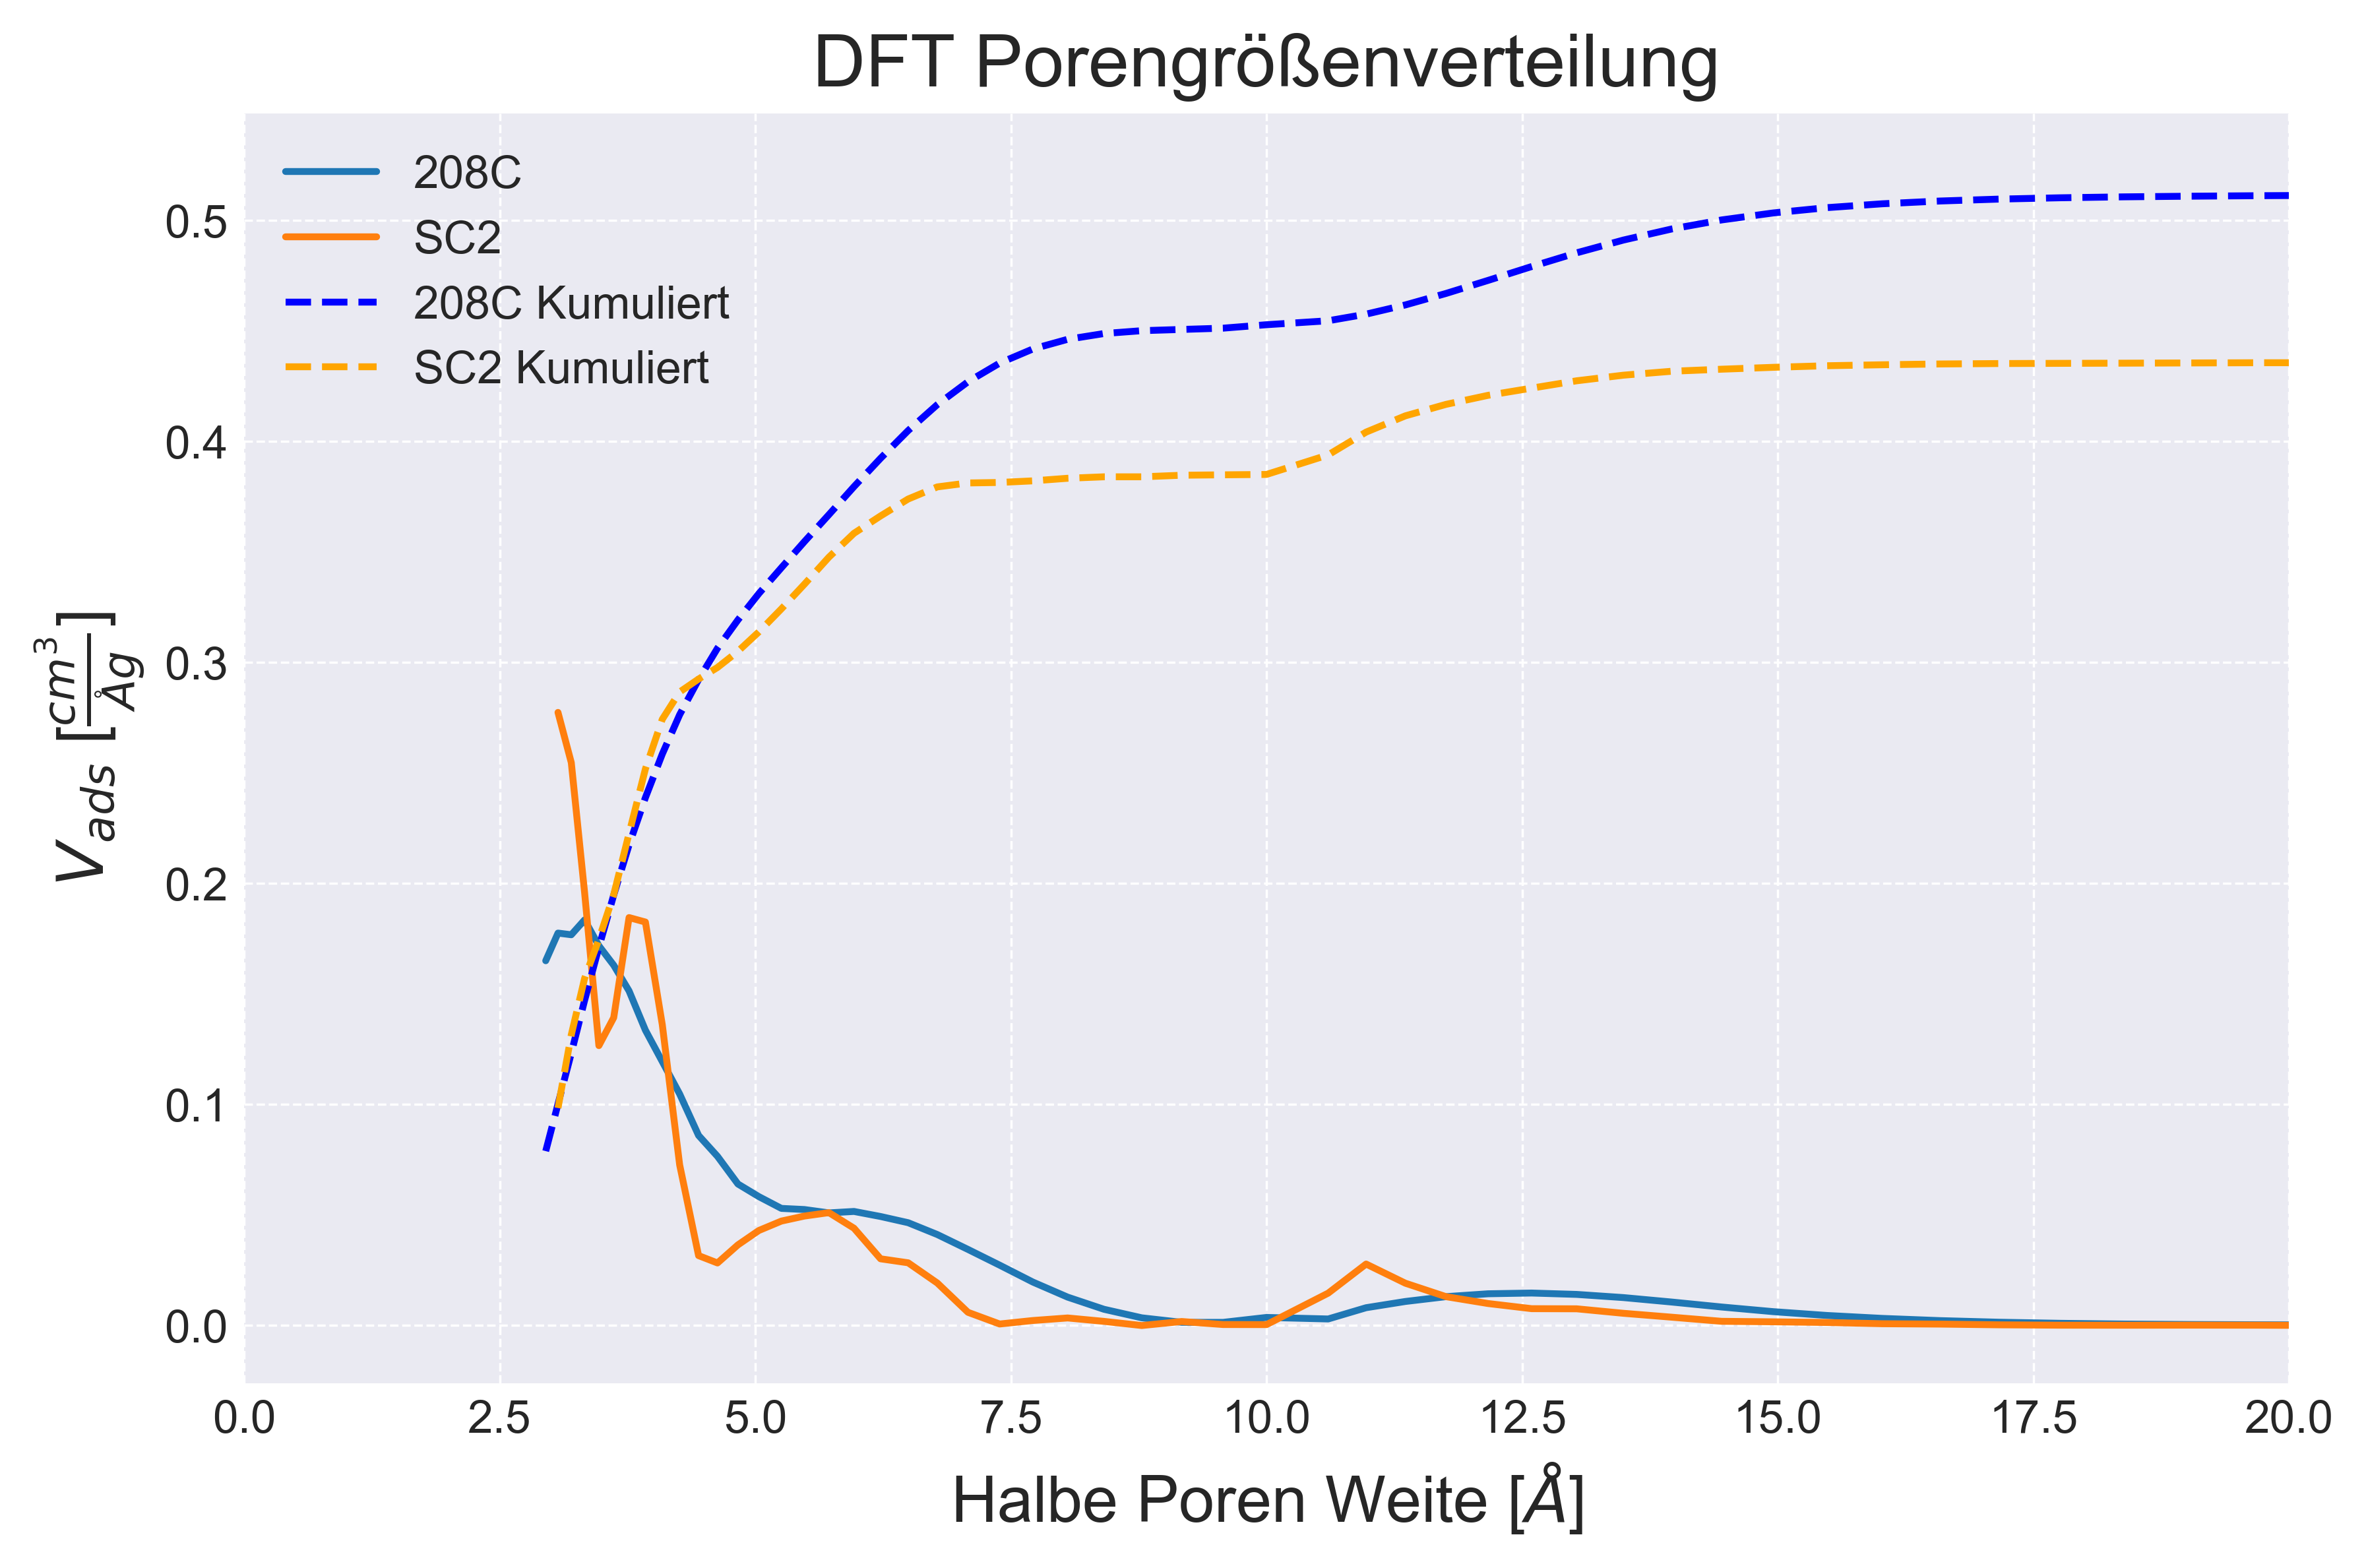

In [244]:
plt.figure(figsize=(8, 5), dpi=500)
Langmuir_SC2=load_data('/Users/nick/Documents/Messdaten BA/Nick_Zobel/BAM_P109_N2_77K_VectorDose__iq_phisy_st1_2024_05_17_13_45_39 (DFT method  Pore Size Distribution).csv',0,3)

Langmuir_208C=load_data('/Users/nick/Documents/Messdaten BA/Nick_Zobel/ERM_FD107_N2_77K_VectorDose__iq_phisy_st2_2024_05_17_13_45_39 (DFT method  Pore Size Distribution).csv',0,3)

# Stil einstellen
plt.style.use('seaborn-darkgrid')  # Beispiel: 'seaborn-darkgrid' Stil

# Achsenbeschriftungen
plt.xlabel(r"Halbe Poren Weite [$\AA$]", fontsize=14)
plt.ylabel(r"$V_{ads}$ [$\frac{cm^3}{\AAg}$]", fontsize=14)

# Daten plotten
plt.plot(Langmuir_208C[1],Langmuir_208C[0], label="208C")
x=np.linspace(np.min(Langmuir_208C[1]),np.max(Langmuir_208C[1]),100)

plt.plot(Langmuir_SC2[1],Langmuir_SC2[0], label="SC2")
x=np.linspace(np.min(Langmuir_SC2[1]),np.max(Langmuir_SC2[1]),100)

Langmuir_SC2=load_data('/Users/nick/Documents/Messdaten BA/Nick_Zobel/BAM_P109_N2_77K_VectorDose__iq_phisy_st1_2024_05_17_13_45_39 (DFT method  Pore Size Distribution).csv',0,1)

Langmuir_208C=load_data('/Users/nick/Documents/Messdaten BA/Nick_Zobel/ERM_FD107_N2_77K_VectorDose__iq_phisy_st2_2024_05_17_13_45_39 (DFT method  Pore Size Distribution).csv',0,1)

# Daten plotten
plt.plot(Langmuir_208C[1],Langmuir_208C[0], label="208C Kumuliert",linestyle="--", color="blue")
x=np.linspace(np.min(Langmuir_208C[1]),np.max(Langmuir_208C[1]),100)

plt.plot(Langmuir_SC2[1],Langmuir_SC2[0], label="SC2 Kumuliert",linestyle="--",color="orange")
x=np.linspace(np.min(Langmuir_SC2[1]),np.max(Langmuir_SC2[1]),100)



# Titel setzen
plt.title("DFT Porengrößenverteilung", fontsize=16)

# Legende hinzufügen

plt.legend()
plt.xlim((0,20))
# Raster hinzufügen
plt.grid(True, which="both", linestyle='--', linewidth=0.5)